Gather data, determine the method of data collection and provenance of the data (3 points)

In the earliest phase, select a data source and problem. Feel free to share and discuss your idea on the class discussion board.

For my final project I am going to take pitching data from https://baseballsavant.mlb.com/. Here I am able to filter and identify types of pitches and their characteristics like velocity, spin rate, pitch type, left to right breaking. Then their website allows for a csv download with all the statistics filtered for. With this I am going to categorize pitchers to certain types of players are they power pitchers or are they more control pitchers.

Identify an Unsupervised Learning Problem (6 points)

Model building and training may depend on their data type(s) and task type(s). When using multiple models, at least one of them should be an unsupervised approach. 

For my unsupervided learning project I am going to group MLB pitcher's pitches based on their pitching types and performance, this is to group pitchers together by similarity and help show what type of pitchers they are and how similar they are to other pitchers in terms of certain pitches they throw. Charactistics like velocity, spin rate, pitch type usage, etc will be factors in our categorizing of pitches. Since there are no pre made labels and that this is a unsupervised learning project we are going to clustering methods to help group together pitcher's pitches that have similar statistics and characteristics. We are not determining the success of a pitcher in anyway but trying to find pitcher's pitches archetypes from our data. Methods for clustering would be something like K-means or hierarchial clustering. 

Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (26 points)

 Go through the initial data cleaning and EDA and judge whether you need to collect more or different data. 

In [145]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


Let's look at the shape and information on our data that we got

In [107]:
data = pd.read_csv("savant_data.csv")

print(data.shape)
print(data.head())

data.info()
data.describe(include = "all").T

(1606, 77)
   pitches  player_id       player_name  total_pitches pitch_type  \
0     1651     642547   Peralta, Freddy           3086         FF   
1     1628     592332    Gausman, Kevin           3030         FF   
2     1595     592662       Ray, Robbie           3069         FF   
3     1454     680730  Parker, Mitchell           2705         FF   
4     1412     668678       Gallen, Zac           3135         FF   

   pitch_percent     ba    iso  babip    slg  ...  xslgdiff  wobadiff  \
0           53.5  0.209  0.171  0.239  0.381  ...    -0.074    -0.039   
1           53.7  0.230  0.149  0.260  0.380  ...    -0.075    -0.041   
2           52.0  0.208  0.150  0.257  0.357  ...    -0.016    -0.008   
3           53.8  0.274  0.184  0.270  0.458  ...    -0.059    -0.039   
4           45.0  0.244  0.168  0.270  0.413  ...    -0.071    -0.035   

   swing_miss_percent  arm_angle  attack_angle  attack_direction  \
0                22.8       41.4      3.852009          8.929384   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pitches,1606.0,NaN,NaN,NaN,250.379826,286.03184,1.0,33.0,149.5,355.75,1651.0
player_id,1606.0,NaN,NaN,NaN,651182.735367,56962.415526,434378.0,621121.0,666157.0,680885.0,829272.0
player_name,1606,304,"Darvish, Yu",10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_pitches,1606.0,NaN,NaN,NaN,1654.968867,813.627586,502.0,934.0,1501.0,2394.0,3282.0
pitch_type,1606,16,FF,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
attack_direction,1539.0,NaN,NaN,NaN,-3.112879,11.23406,-137.451923,-10.72993,-3.667354,6.21636,33.159441
swing_path_tilt,1539.0,NaN,NaN,NaN,32.717556,2.656241,22.665211,31.171575,32.660411,33.997438,52.863987
rate_ideal_attack_angle,1539.0,NaN,NaN,NaN,0.495003,0.15604,0.0,0.428571,0.5,0.5625,1.0
intercept_ball_minus_batter_pos_x_inches,1539.0,NaN,NaN,NaN,36.979109,3.293437,16.302869,35.351227,36.901479,38.824593,53.774004


Let's see if our data has a lot of missing values, if any column has too many empty slots it might be good to get rid of them

In [108]:
missing_data = data.isna().sum().sort_values(ascending=False)
missing_ratio = (data.isna().mean()).sort_values(ascending=False)

print("Missing data: ", missing_data.head(10))
print("Missing ratio: ", missing_ratio.head(10))

Missing data:  babip                      143
xslgdiff                   134
xba                        134
xslg                       134
xbadiff                    134
barrels_total              131
hardhit_percent            131
launch_angle               131
launch_speed               131
barrels_per_bbe_percent    131
dtype: int64
Missing ratio:  babip                      0.089041
xslgdiff                   0.083437
xba                        0.083437
xslg                       0.083437
xbadiff                    0.083437
barrels_total              0.081569
hardhit_percent            0.081569
launch_angle               0.081569
launch_speed               0.081569
barrels_per_bbe_percent    0.081569
dtype: float64


From this calculation it looks like less than 1% of the data is missing from these columns, so I am deciding to keep them in for now. 

Now I am going to filter pitches that are really rare (like a skrew ball) and haven't been thrown more than 25 times. 

In [109]:
pitch_counts = data["pitch_type"].value_counts()
valid_pitch_types = pitch_counts[pitch_counts >= 5].index

cleaned_data = data[data["pitch_type"].isin(valid_pitch_types)]

cleaned_data = cleaned_data[cleaned_data["pitches"] > 25]
cleaned_data = cleaned_data.dropna()
print(data.shape)
print(cleaned_data.shape)

(1606, 77)
(1246, 77)


Let's have a look at our columns and see which ones we want to keep in our data and then create our new data with just those columns in it

In [110]:
data.columns

Index(['pitches', 'player_id', 'player_name', 'total_pitches', 'pitch_type',
       'pitch_percent', 'ba', 'iso', 'babip', 'slg', 'woba', 'xwoba', 'xba',
       'hits', 'abs', 'launch_speed', 'launch_angle', 'spin_rate', 'velocity',
       'effective_speed', 'whiffs', 'swings', 'takes', 'eff_min_vel',
       'release_extension', 'pos3_int_start_distance',
       'pos4_int_start_distance', 'pos5_int_start_distance',
       'pos6_int_start_distance', 'pos7_int_start_distance',
       'pos8_int_start_distance', 'pos9_int_start_distance', 'pitcher_run_exp',
       'run_exp', 'bat_speed', 'swing_length', 'pa', 'bip', 'singles',
       'doubles', 'triples', 'hrs', 'so', 'k_percent', 'bb', 'bb_percent',
       'api_break_z_with_gravity', 'api_break_z_induced', 'api_break_x_arm',
       'api_break_x_batter_in', 'hyper_speed', 'bbdist', 'hardhit_percent',
       'barrels_per_bbe_percent', 'barrels_per_pa_percent', 'release_pos_z',
       'release_pos_x', 'plate_x', 'plate_z', 'obp', 'barrels_to

In [111]:
pitching_cols = [
    # General info
    "player_id", "player_name", "pitch_type", "pitch_percent", "pitches",
    # Ball characteristics
    "velocity", "hyper_speed", "effective_speed", "spin_rate",
    "api_break_z_with_gravity","api_break_z_induced","api_break_x_arm",
    "api_break_x_batter_in",
    # release mechanics
    "release_pos_x", "release_pos_z", "release_extension",
    "arm_angle","attack_angle","attack_direction","swing_path_tilt","rate_ideal_attack_angle",
    # against batters
    "swing_miss_percent","hardhit_percent","barrels_per_bbe_percent","barrels_per_pa_percent"
]
new_cols = []
for col in pitching_cols:
    if col in cleaned_data.columns:
        new_cols.append(col)

new_data = cleaned_data[new_cols].copy()
new_data.shape

(1246, 25)

We need to standaridize the features in our data so we can use a clustering method. We only need to standarize numberic values so we have to make sure we take out strings like player_names before standarizing and then put them back in after

In [112]:
numbered_data = new_data.select_dtypes(include=["number"]).columns
string_data = new_data.select_dtypes(include=["object", "string"]).columns
# player ID is numberic but it shouldn't be standarized as its a identifier unit
if 'player_id' in numbered_data:
    numbered_data = numbered_data.drop('player_id')
    string_data = string_data.append(pd.Index(['player_id']))

numbers = new_data[numbered_data]
strings = new_data[string_data]


scaler = StandardScaler()
number_data_scaled = scaler.fit_transform(numbers)

scaled_numbers_dataset = pd.DataFrame(number_data_scaled, columns = numbered_data, index = new_data.index)
full_dataset = pd.concat([strings,scaled_numbers_dataset], axis = 1)


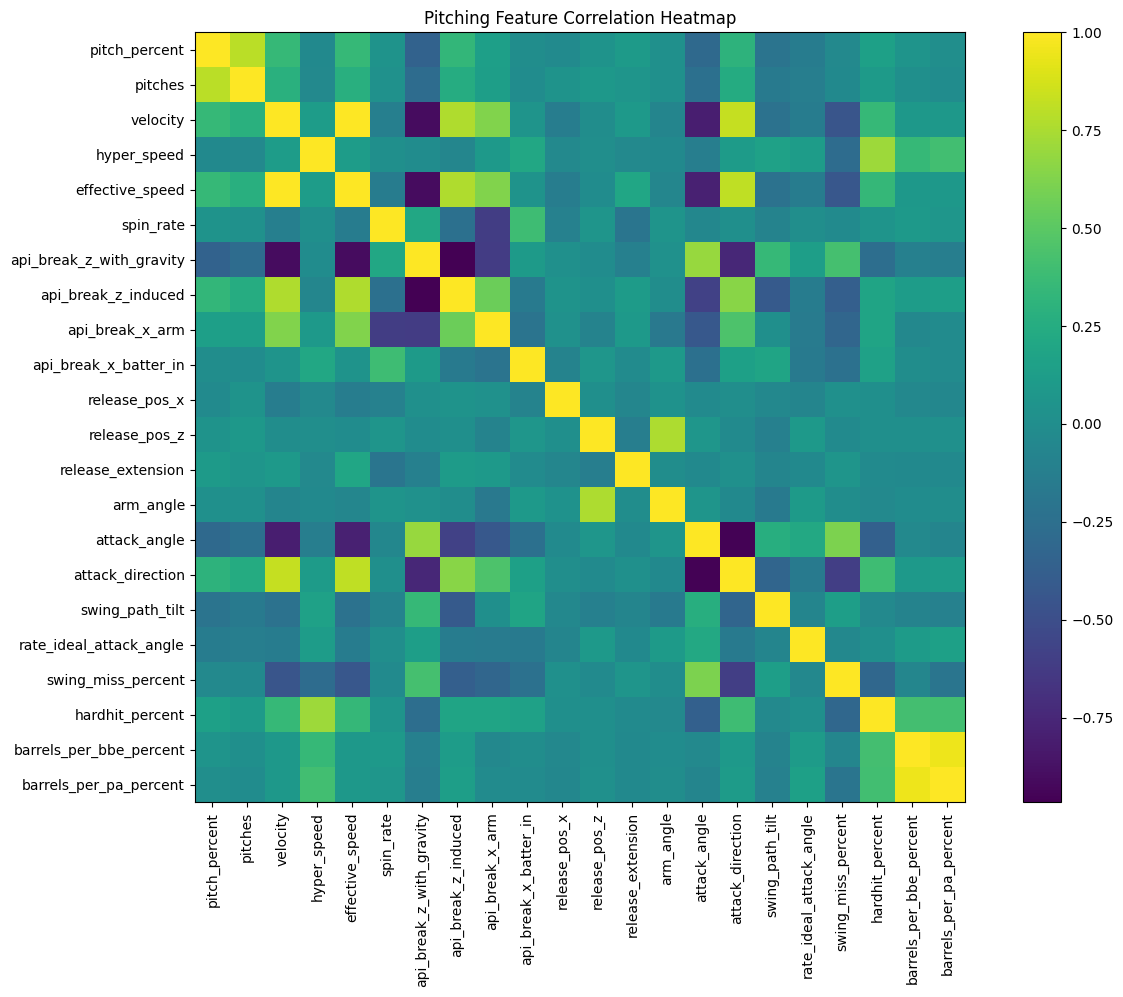

In [113]:
correlation_mat = scaled_numbers_dataset.corr()

plt.figure(figsize=(15,10))
plt.imshow(correlation_mat)
plt.colorbar()
plt.xticks(range(len(numbered_data)), numbered_data, rotation=90)
plt.yticks(range(len(numbered_data)), numbered_data)
plt.title("Pitching Feature Correlation Heatmap")
plt.show()

EDA Procedure Example:

Describe the factors or components that make up the dataset (The "factors" here are called "features" in the machine learning term. These factors are often columns in the tabulated data). For each factor, use a box-plot, scatter plot, histogram, etc., to describe the data distribution as appropriate.

Above we showed all the columns I used for our clustering pitches project and make a correlation matrix graph to show how well they correlate to each other.





Describe correlations between different factors of the dataset and justify your assumption that they are correlated or not correlated. You may use numeric or qualitative/graphical analysis for this step.

Above in my correlation matrix plot you can see that many characteristics do correlate well with each other and others do not. This is to be expected with pitches in baseball. It would be hard to go one by one, but its easy to see that 
# Ball characteristics
    "velocity", "hyper_speed", "effective_speed", "spin_rate",
    "api_break_z_with_gravity","api_break_z_induced","api_break_x_arm",
    "api_break_x_batter_in"
Correlate well together and
# release mechanics
    "release_pos_x", "release_pos_z", "release_extension",
    "arm_angle","attack_angle","attack_direction","swing_path_tilt","rate_ideal_attack_angle",
Don't Correlate well together, but against ball characterisitcs they correlate better


Determine if any data needs to be transformed. For example, if you're planning on using an SVM method for prediction, you may need to normalize or scale the data if there is a considerable difference in the range of the data.

Upon I did normalize my numeric data for this project, as there could be high variance in range in data.


Using your hypothesis, indicate if it's likely that you should transform data, such as using a log transform or other transformation of the dataset.

Other than normalizing I don't believe it would have been right to transform my data using logs or anything but normalization. As there usually a normal range for pitching data and the characteristics i have. 

You should determine if your data has outliers or needs to be cleaned in any way. Are there missing data values for specific factors? How will you handle the data cleaning? Will you discard, interpolate or otherwise substitute data values?

I cleaned out NaN Values and the normalization should have helped the outliers in the data. Luckily, this data set is good and recent so there wasn't that many missing factors in the data

If you believe that specific factors will be more important than others in your analysis, you should mention which and why. You will use this to confirm your intuitions in your final write-up.

I believe I have already separate the useful factors for the not useful when filtered my columns and have account for that and you can see that in my work

Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions (70 points)

Let's first start with K-Means clustering, This will group pitchers and pitchtype archetypes based on pitch features that we standarized in code already. 

(1246, 22)


/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_s

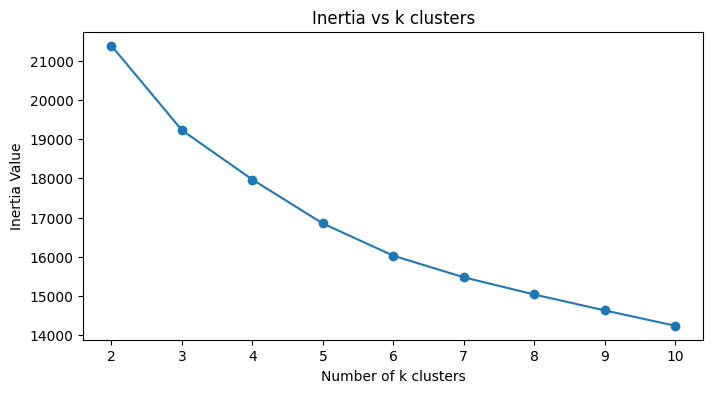

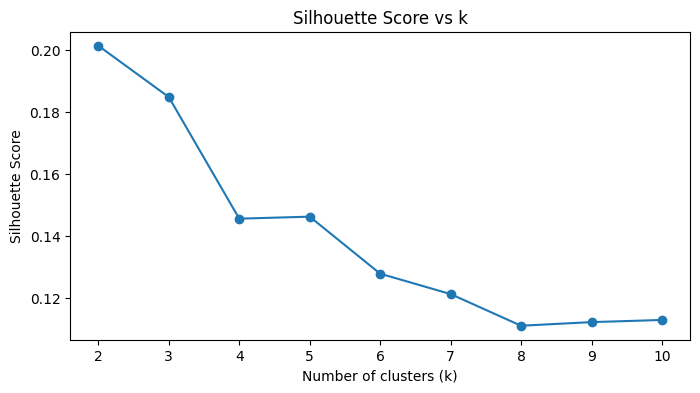

In [115]:
x = scaled_numbers_dataset.copy()

print(x.shape)

inertias = []
silhouettes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    sil = silhouette_score(x, labels)
    silhouettes.append(sil)

# plottimg inertia 
plt.figure(figsize=(8,4))
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of k clusters")
plt.ylabel("Inertia Value")
plt.title("Inertia vs k clusters")
plt.show()

# plotting the silhouette score
plt.figure(figsize=(8,4))
plt.plot(k_values, silhouettes, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()

With plotting our Silhouette score and inertia score, we come to a crossroads. While the "best" option would be to choose k = 2 because it simply it had the best scores, I think in terms of our project for pitching archetypes for baseball pitchers we should actually go with k = 4. Yes, we do need to sacrifice not use the "best", but doing k = 4 is going to give us more descriptive groups for pitchers to be categorized in while I believe k = 2 will give us less descriptive categories like "hard thrower, soft throwers. But according to our graph I don't think we'll have to suffer that much from not choosing the best as k = 4 still gives a good answer while not needing to sacrificing too much. 

In [ ]:
k = 4  

kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(x)

# Attach labels back to new_data
new_data["kmeans_cluster"] = kmeans_labels

# Quality metrics
kmeans_silhouette = silhouette_score(x, kmeans_labels)
kmeans_db = davies_bouldin_score(x, kmeans_labels)

print("Silhouette Score:", kmeans_silhouette)
print("Davies-Bouldin Score:", kmeans_db)


K-Means Silhouette: 0.14568476500218291
K-Means Davies-Bouldin: 2.0680798406368397


/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_s

In [122]:
# Choose one model to interpret in depth, e.g., K-Means
cluster_summary = new_data.groupby("kmeans_cluster")[[
    "velocity",
    "hyper_speed",
    "spin_rate",
    "api_break_z_induced",
    "api_break_x_batter_in",
    "release_pos_x",
    "release_pos_z",
    "arm_angle",
    "swing_miss_percent",
    "hardhit_percent",
    "barrels_per_pa_percent",
    "pitch_percent"
]].mean()

cluster_summary


,velocity,hyper_speed,spin_rate,api_break_z_induced,api_break_x_batter_in,release_pos_x,release_pos_z,arm_angle,swing_miss_percent,hardhit_percent,barrels_per_pa_percent,pitch_percent
kmeans_cluster,,,,,,,,,,,,
0,93.972464,92.050242,2296.541063,1.205931,-0.144493,-0.826667,5.854106,40.142512,19.394203,47.271251,7.377700,37.091787
1,82.237251,91.972727,2522.175166,-0.252947,0.009074,-0.939047,5.810288,39.648559,30.183370,36.443276,5.924004,14.326829
2,86.013537,91.800873,1670.305677,0.399077,-0.737487,-0.907074,5.718690,36.122707,30.343231,34.265122,5.328035,13.998253
3,91.801114,92.451532,2271.805014,0.803183,0.137062,-0.967744,5.718189,35.935376,16.921170,44.326821,6.925140,12.332312


Cluster 0: Speed, High Velocity, Good spin rate, ex. FastBalls
Cluster 1: Low Velocity, High Sping, ex. Breaking balls (Curve ball, Slider)
Cluster 2: Off Speed, Medium Velocity, ex. Change Ups
Cluster 3: Good Velocity, Good depth, Ground ball making ex. Sinkers 

Now let's try a different model: Hierarchial Clustering / Agglomerative Clustering and let's test some hyperparameters in it as well 

In [137]:
linkages = ["ward", "average", "complete"]
results = []
# try different linkages and different ranges of clusters
for link in linkages:
    for n_c in range(2, 11):
        if link == "ward":
            model = AgglomerativeClustering(n_clusters=n_c, linkage=link)
        else:
            model = AgglomerativeClustering(n_clusters=n_c, linkage=link, metric="euclidean")

        labels = model.fit_predict(x)
        sil = silhouette_score(x, labels)
        db = davies_bouldin_score(x, labels)
        
        results.append((link, n_c, sil, db))

# Sort descending silhouette scores
res_sorted = sorted(results, key=lambda x: x[2], reverse=True)
for r in res_sorted[:10]:
    print("Linkage:", r[0], ", n_clusters:", r[1], ", Silhouette Score:", round(r[2],3), "| davies_bouldin_score:", round(r[3],3))

/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: Run

Linkage: average , n_clusters: 2 , Silhouette Score: 0.498 | davies_bouldin_score: 0.374
Linkage: average , n_clusters: 3 , Silhouette Score: 0.28 | davies_bouldin_score: 1.197
Linkage: complete , n_clusters: 2 , Silhouette Score: 0.264 | davies_bouldin_score: 1.621
Linkage: average , n_clusters: 4 , Silhouette Score: 0.227 | davies_bouldin_score: 1.284
Linkage: average , n_clusters: 5 , Silhouette Score: 0.189 | davies_bouldin_score: 1.311
Linkage: ward , n_clusters: 2 , Silhouette Score: 0.18 | davies_bouldin_score: 1.834
Linkage: average , n_clusters: 6 , Silhouette Score: 0.169 | davies_bouldin_score: 1.334
Linkage: average , n_clusters: 7 , Silhouette Score: 0.161 | davies_bouldin_score: 1.202
Linkage: ward , n_clusters: 3 , Silhouette Score: 0.16 | davies_bouldin_score: 2.024
Linkage: complete , n_clusters: 3 , Silhouette Score: 0.149 | davies_bouldin_score: 1.931


/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: Run

Our best was: Linkage: average | n_clusters: 2 | Silhouette: 0.498 | DB: 0.374

However, we come across the same issue we had with K-means clustering where for our project n_clusters: 2 is going to give us not enough clusters to make more descriptive archetypes for pitchers, so I am actually going to go with Linkage: average | n_clusters: 4 | Silhouette: 0.227 | DB: 1.284, 

so we can compare with our K-means k=4 and see the differences. 

Hierarchical clustering overall does a better job at finding niche groupings than Kmeans as it handles features that are correlated better, is able to get non-spherical cluster shapes, and does not make the model have equal sized clusters. 

We also were about to some hyperparameter tuning with this function and we ended up with using linkage: average and 4 clusters

In [ ]:
best_linkage = "average" 
best_n_clusters = 4
agg_final = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric="euclidean")
agg_labels = agg_final.fit_predict(x)

new_data["agg_cluster"] = agg_labels

agg_silhouette = silhouette_score(x, agg_labels)
agg_db = davies_bouldin_score(x, agg_labels)

print("Agglomerative Clustering Silhouette:", agg_silhouette)
print("Agglomerative Clustering Davies-Bouldin:", agg_db)


Agglomerative Silhouette: 0.22674619782561029
Agglomerative Davies-Bouldin: 1.2844334862335554


/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/brennanhan/.venvs/ds/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


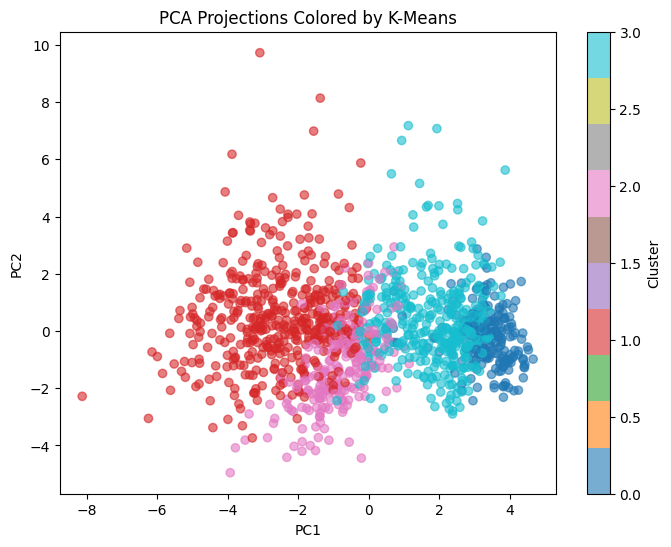

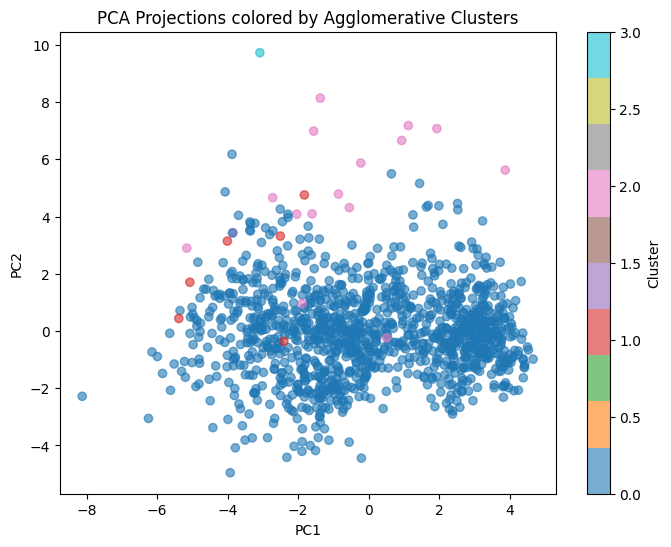

In [166]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "kmeans_cluster": new_data["kmeans_cluster"],
    "agg_cluster": new_data["agg_cluster"],
    "pitch_type": new_data["pitch_type"],
    "player_name": new_data["player_name"]
})

# Plotting K-Means
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["kmeans_cluster"], cmap="tab10", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projections Colored by K-Means")
plt.colorbar(scatter, label="Cluster")
plt.show()
# Plotting Agglomerative
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["agg_cluster"], cmap="tab10", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projections colored by Agglomerative Clusters")
plt.colorbar(scatter, label="Cluster")
plt.show()


In [167]:
cluster_summary_agg = new_data.groupby("agg_cluster")[[
    "velocity",
    "hyper_speed",
    "spin_rate",
    "api_break_z_induced",
    "api_break_x_batter_in",
    "release_pos_x",
    "release_pos_z",
    "arm_angle",
    "swing_miss_percent",
    "hardhit_percent",
    "barrels_per_pa_percent",
    "pitch_percent"
]].mean()

cluster_summary_agg


,velocity,hyper_speed,spin_rate,api_break_z_induced,api_break_x_batter_in,release_pos_x,release_pos_z,arm_angle,swing_miss_percent,hardhit_percent,barrels_per_pa_percent,pitch_percent
agg_cluster,,,,,,,,,,,,
0,87.72870,92.053802,2251.850368,0.424583,-0.118349,-0.937923,5.775380,38.030744,24.519624,39.684824,6.129523,17.716762
1,77.40000,93.466667,2584.666667,-0.717645,0.355658,2.233333,5.803333,40.383333,22.233333,70.793651,3.518519,2.800000
2,84.85625,93.837500,2401.250000,0.097184,-0.188863,-0.968750,5.643125,35.000000,30.331250,57.612943,22.977305,5.356250
3,80.70000,102.600000,3022.000000,-1.234290,0.131430,-0.590000,6.250000,50.000000,44.400000,100.000000,20.000000,2.200000


K-Means (From prior in the project)
Cluster 0: Speed, High Velocity, Good spin rate, ex. FastBalls
Cluster 1: Low Velocity, High Sping, ex. Breaking balls (Curve ball, Slider)
Cluster 2: Off Speed, Medium Velocity, ex. Change Ups
Cluster 3: Good Velocity, Good depth, Ground ball making ex. Sinkers 


Agglomerative Clustering
Cluster 0: Very Average MLB pitches
Cluster 1: High Spin, Breaking Balls
Cluster 2: Off Speed, Dead Zone
Cluster 3: Outlier Group

We can come to the conclusion from our two unsupervised models (k means and Agglomerative) that K-Means actually gives us a better result in categorizing and clustering pitching types. The Agglomerative clustering gave us insight on pitchers that were more outliers than different pitching types. 

In [168]:
pca_df[pca_df["player_name"] == "Skenes, Paul"]

,PC1,PC2,kmeans_cluster,agg_cluster,pitch_type,player_name
24,4.391397,-1.634591,0,0,FF,"Skenes, Paul"
281,-1.995253,-1.867584,1,0,ST,"Skenes, Paul"
339,1.001207,-0.544428,2,0,FS,"Skenes, Paul"
443,-1.654859,-4.002617,2,0,CH,"Skenes, Paul"
507,2.592456,0.329274,3,0,SI,"Skenes, Paul"
753,-2.026054,-3.062456,1,0,SL,"Skenes, Paul"
836,-2.848561,1.230396,1,0,CU,"Skenes, Paul"


Conclusion: 
While we can see that both unsupervised clustering methods did work on the data, k-means gave us the better results, and shows that just because one method is more "powerful" does not mean it matches as well with the data you are analyzing. It is important to understand your methods and fit them with the type of analysis that you are doing. 

What this work can be used for in the future:
I believe that with this model players & coaches can determine whether or not a pitch is working like they believe it to. Say a player is throwing a certain pitch but not getting the results they want, but in this model their pitch isn't classified where it should be maybe something is wrong. It can also be used for sports analysis for people trying to determine what pitch a player threw, having this model would be a good indicator for classification and could be shown fast to maybe a crowd in a stadium or on tv without a human verifying the pitch type. 

For future improvements, I think it would be interesting to have pitch by pitch data so i can see how close my custering is to what was actually thrown. It would also be interesting to see how this would do with a different model as well or underhand throwning softball data. 